In [15]:
import os, sys

# Open a file
VCB_PATH = "../tempData"
names = [d for d in os.listdir(VCB_PATH) if os.path.isdir(os.path.join(VCB_PATH, d))]

audio_clips = {}
for name in names:
    audio_clips[name] = os.listdir(VCB_PATH + '/' + name)

names = sorted(names, key=lambda name : -len(audio_clips[name]))
print(names[:10])
print(audio_clips[names[0]])

['Aamir_Khan', 'Adam_Driver', 'A.R._Rahman', 'Adam_Copeland', 'Aaron_Tveit', 'Abigail_Spencer', 'A.J._Buckley', 'Aaron_Yoo', 'Adam_Beach', 'Adam_Brody']
['5ablueV_1tw_0000001.wav', '5ablueV_1tw_0000002.wav', '5ablueV_1tw_0000003.wav', '5ablueV_1tw_0000004.wav', '5ablueV_1tw_0000005.wav', '5ablueV_1tw_0000006.wav', '5ablueV_1tw_0000007.wav', '5ablueV_1tw_0000008.wav', '5ablueV_1tw_0000009.wav', '5ablueV_1tw_0000010.wav', '5ablueV_1tw_0000011.wav', '5ablueV_1tw_0000012.wav', '5ablueV_1tw_0000013.wav', '5ablueV_1tw_0000014.wav', '5ablueV_1tw_0000015.wav', '5ablueV_1tw_0000016.wav', '5ablueV_1tw_0000017.wav', '5ablueV_1tw_0000018.wav', '_JpHD6VnJ3I_0000001.wav', '_JpHD6VnJ3I_0000002.wav', 'A7Hh1WKmHsg_0000001.wav', 'A7Hh1WKmHsg_0000002.wav', 'A8SBCxYzJgs_0000001.wav', 'A8SBCxYzJgs_0000002.wav', 'A8SBCxYzJgs_0000003.wav', 'A8SBCxYzJgs_0000004.wav', 'A8SBCxYzJgs_0000005.wav', 'A8SBCxYzJgs_0000006.wav', 'bDxy7bnj_bc_0000001.wav', 'bDxy7bnj_bc_0000002.wav', 'bDxy7bnj_bc_0000003.wav', 'bDxy7bnj

In [18]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import IPython.display as ipd

import librosa
import librosa.display

audio_path = '/'.join([VCB_PATH, names[0], audio_clips[names[0]][0]])
print(audio_path)
ipd.Audio(audio_path)

ModuleNotFoundError: No module named 'librosa'

120321
(128, 941)
[[  3.10759864e-03   3.99696995e-03   1.24353262e-03 ...,   8.01938735e-02
    8.55960766e-03   7.35738875e-02]
 [  1.43713154e-02   1.02295738e-02   4.84250225e-03 ...,   9.12700457e-02
    5.23104113e-02   1.11940497e-01]
 [  2.63238186e-02   1.68754469e-02   8.66508865e-03 ...,   1.04112134e-01
    9.86870679e-02   1.53542177e-01]
 ..., 
 [  9.55325087e-08   8.59488531e-08   2.51319880e-08 ...,   5.33645582e-04
    3.28103338e-04   2.37834471e-04]
 [  1.52117733e-08   5.86232699e-09   3.27817363e-09 ...,   1.42545216e-03
    3.66180619e-04   2.59150425e-04]
 [  1.78301134e-08   1.16174944e-08   2.36489619e-08 ...,   7.52475456e-04
    2.13912988e-04   1.34996517e-04]]
[[ 0.51009076  0.523754    0.46036979 ...,  0.68655529  0.56509437
   0.6818781 ]
 [ 0.5932247   0.57476983  0.53417137 ...,  0.69357867  0.66336116
   0.70466104]
 [ 0.62608125  0.60194455  0.56575927 ...,  0.70072531  0.69782017
   0.7218161 ]
 ..., 
 [ 0.          0.          0.         ...,  0.414

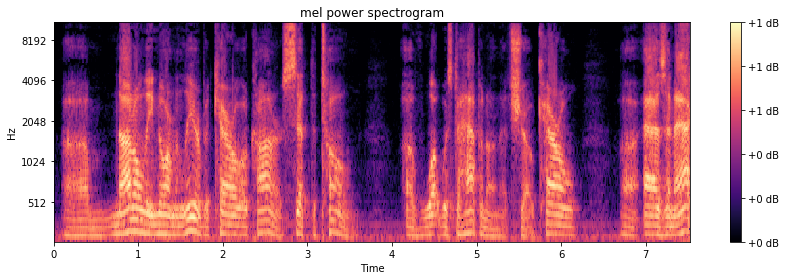

In [7]:
def get_spectrogram(audio_path):
    y, sr = librosa.load(audio_path, sr=16000)
    S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128, n_fft=512, hop_length=128)
    log_S = librosa.power_to_db(S, ref=np.max)
    mn = np.min(log_S)
    mx = np.max(log_S)
    log_S -= mn
    log_S /= (mx - mn)
    return log_S

# From http://nbviewer.jupyter.org/github/librosa/librosa/blob/master/examples/LibROSA%20demo.ipynb
y, sr = librosa.load(audio_path, sr=16000)
print(len(y))

# Let's make and display a mel-scaled power (energy-squared) spectrogram
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128, n_fft=512, hop_length=128)
#log_S = librosa.power_to_db(S, ref=np.max)
log_S = get_spectrogram(audio_path)
print(log_S.shape)
print(S)
print(log_S)
print(sr)

# Make a new figure
plt.figure(figsize=(12,4))
librosa.display.specshow(log_S, sr=sr, hop_length=128, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

In [8]:
NUM_PEOPLE = 10
AUDIO_LENGTH = 128 * 3 # Around 128 columns in spectrogram is one second
AUDIO_GAP = 128 // 2 # Gap of half a second
audio = []
speaker = []
for idx, name in enumerate(names[:NUM_PEOPLE]):
    print(name)
    for audio_clip in audio_clips[name]:
        base_spec = get_spectrogram('/'.join([VCB_PATH, name, audio_clip]))
        length = base_spec.shape[1]
        for start in range(0, length - AUDIO_LENGTH + 1, AUDIO_GAP):
            spec = base_spec[:, start : start + AUDIO_LENGTH]
            audio += [spec]
            speaker += [idx]

print(len(audio))
print(len(speaker))

Rob_Reiner
Bob_Barker
Alan_Alda
Stephen_Fry
Louis_C.K.
Peter_Jackson
Vince_Gilligan
J.J._Abrams
Quentin_Tarantino
David_Attenborough
61093
61093


In [9]:
import torch
import torch.autograd as autograd
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data_utils

torch.manual_seed(42)

In [10]:
n = len(audio)
import random

asdf = list(zip(audio, speaker))
random.shuffle(asdf)
audio, speaker = list(map(list,zip(*asdf)))
print(speaker)

[5, 3, 1, 1, 6, 7, 5, 6, 0, 1, 9, 0, 1, 7, 7, 1, 2, 6, 5, 2, 3, 0, 6, 9, 3, 1, 9, 3, 3, 1, 0, 6, 0, 9, 9, 8, 1, 0, 5, 7, 4, 6, 5, 0, 4, 5, 0, 4, 1, 1, 3, 1, 9, 7, 7, 2, 2, 2, 7, 7, 0, 0, 4, 1, 2, 5, 3, 2, 0, 0, 3, 6, 9, 2, 0, 3, 5, 3, 7, 4, 3, 1, 0, 8, 1, 9, 2, 6, 3, 2, 4, 3, 0, 4, 1, 6, 0, 0, 0, 0, 6, 0, 6, 3, 0, 5, 2, 4, 2, 6, 0, 5, 2, 6, 9, 2, 2, 9, 0, 7, 4, 9, 2, 1, 1, 5, 5, 1, 5, 8, 1, 6, 9, 3, 7, 7, 8, 5, 1, 0, 9, 2, 6, 4, 9, 1, 1, 7, 0, 7, 9, 1, 6, 0, 7, 0, 0, 3, 9, 2, 5, 1, 1, 6, 7, 2, 6, 2, 6, 1, 3, 5, 6, 3, 5, 5, 6, 5, 7, 1, 2, 9, 6, 6, 3, 2, 1, 0, 4, 7, 6, 4, 8, 0, 0, 0, 4, 0, 1, 0, 3, 1, 0, 3, 6, 7, 7, 8, 0, 2, 8, 0, 7, 7, 2, 0, 7, 7, 3, 9, 9, 5, 2, 0, 4, 1, 8, 2, 5, 8, 4, 1, 3, 2, 3, 5, 2, 0, 9, 2, 5, 8, 8, 1, 1, 1, 0, 4, 5, 5, 9, 7, 0, 7, 0, 7, 1, 8, 1, 7, 2, 0, 2, 7, 3, 1, 1, 0, 9, 0, 0, 2, 2, 5, 1, 1, 0, 6, 7, 1, 2, 1, 4, 7, 0, 1, 4, 4, 0, 1, 5, 0, 7, 7, 6, 8, 0, 9, 3, 2, 0, 5, 3, 6, 1, 5, 5, 1, 1, 1, 5, 5, 7, 2, 9, 1, 7, 1, 0, 1, 9, 9, 5, 2, 7, 6, 0, 6, 4, 0, 5, 1, 7, 

In [11]:
train_size = n // 2
val_size = n // 4
audio_train = torch.FloatTensor(audio[:train_size])
print(audio_train.shape)

speaker_train = torch.IntTensor(speaker[:train_size])
print(speaker_train.shape)

audio_val = torch.FloatTensor(audio[train_size : train_size + val_size])
print(audio_val.shape)

speaker_val = torch.IntTensor(speaker[train_size : train_size + val_size])
print(speaker_val.shape)

audio_test = torch.FloatTensor(audio[train_size + val_size:])
print(audio_test.shape)

speaker_test = torch.IntTensor(speaker[train_size + val_size:])
print(speaker_test.shape)

torch.Size([30546, 128, 384])
torch.Size([30546])
torch.Size([15273, 128, 384])
torch.Size([15273])
torch.Size([15274, 128, 384])
torch.Size([15274])


In [12]:
torch.cuda.is_available()
dtype = torch.cuda.FloatTensor

In [35]:
# Based off of http://pytorch.org/tutorials/beginner/nlp/sequence_models_tutorial.html
class LSTMVoice(nn.Module):

    def __init__(self, input_dim, hidden_dim, depth, batch_size, num_labels):
        super(LSTMVoice, self).__init__()
        self.hidden_dim = hidden_dim
        self.input_dim = input_dim
        self.depth = depth
        self.batch_size = batch_size
        self.num_labels = num_labels
        
        self.lstm = nn.LSTM(input_dim, hidden_dim, depth)
        self.fc = nn.Linear(hidden_dim, num_labels)
        self.hidden = self.init_hidden()

    def init_hidden(self):
        # (num_layers, batch_size, hidden_dim)
        return (autograd.Variable(torch.zeros(self.depth, self.batch_size, self.hidden_dim).type(dtype)),
                autograd.Variable(torch.zeros(self.depth, self.batch_size, self.hidden_dim).type(dtype)))

    def forward(self, batch):
        lstm_out, _ = self.lstm(batch, self.hidden)
        lstm_out_mean = torch.mean(lstm_out, 0)
        label_space = self.fc(lstm_out_mean)
        scores = nn.functional.log_softmax(label_space)
        return scores

In [36]:
INPUT_DIM = 128
HIDDEN_DIM = 256
DEPTH = 1
BATCH_SIZE = 64

train = data_utils.TensorDataset(audio_train, speaker_train)
train_loader = data_utils.DataLoader(train, batch_size=64, shuffle=True)

model = LSTMVoice(INPUT_DIM, HIDDEN_DIM, DEPTH, BATCH_SIZE, NUM_PEOPLE)
model = model.cuda()

loss_function = nn.NLLLoss()
optimizer = optim.RMSprop(model.parameters(), lr=0.01)

losses = []
running_loss = 0.0
for epoch in range(5):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        if inputs.shape[0] != 64:
            continue
        inputs = inputs.permute(2, 0, 1)

        inputs = autograd.Variable(inputs.type(dtype))
        labels = autograd.Variable(labels.type(dtype).long())

        model.zero_grad()
        
        scores = model(inputs)
        loss = loss_function(scores, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        losses += [loss.data[0]]
        running_loss += loss.data[0]
        if i % 100 == 99:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0


[1,   100] loss: 2.456
[1,   200] loss: 1.599
[1,   300] loss: 1.281
[1,   400] loss: 1.011
[2,   100] loss: 0.793
[2,   200] loss: 0.608
[2,   300] loss: 0.556
[2,   400] loss: 0.484
[3,   100] loss: 0.450
[3,   200] loss: 0.411
[3,   300] loss: 0.383
[3,   400] loss: 0.349
[4,   100] loss: 0.335
[4,   200] loss: 0.266
[4,   300] loss: 0.325
[4,   400] loss: 0.297
[5,   100] loss: 0.290
[5,   200] loss: 0.216
[5,   300] loss: 0.215
[5,   400] loss: 0.278


In [67]:
optimizer = optim.Adagrad(model.parameters(), lr=0.001)

for i in range(5):
    epoch = epoch + 1
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        if inputs.shape[0] != 64:
            continue
        inputs = inputs.permute(2, 0, 1)

        inputs = autograd.Variable(inputs.type(dtype))
        labels = autograd.Variable(labels.type(dtype).long())

        model.zero_grad()

        scores = model(inputs)
        loss = loss_function(scores, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        losses += [loss.data[0]]
        running_loss += loss.data[0]
        if i % 100 == 99:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 100))
            #print(scores.data[0])
            running_loss = 0.0

[28,   100] loss: 1.744
[28,   200] loss: 1.747
[28,   300] loss: 1.747
[28,   400] loss: 1.737
[29,   100] loss: 1.739
[29,   200] loss: 1.753
[29,   300] loss: 1.739
[29,   400] loss: 1.754
[30,   100] loss: 1.735
[30,   200] loss: 1.745
[30,   300] loss: 1.754
[30,   400] loss: 1.751
[31,   100] loss: 1.736
[31,   200] loss: 1.748
[31,   300] loss: 1.742
[31,   400] loss: 1.757
[32,   100] loss: 1.760
[32,   200] loss: 1.755
[32,   300] loss: 1.735
[32,   400] loss: 1.727


In [37]:
def evaluate(model, audio, speaker):
    
    data = data_utils.TensorDataset(audio, speaker)
    data_loader = data_utils.DataLoader(data, batch_size=64, shuffle=True)
    
    correct = 0
    total = 0
    for i, batch in enumerate(data_loader, 0):
        inputs, labels = batch
        if inputs.shape[0] != 64:
            continue
        total += 64
        
        inputs = inputs.permute(2, 0, 1)
        inputs = autograd.Variable(inputs.type(dtype))
        scores = model(inputs).data
        for i, x in enumerate(scores):
            j = max(range(len(x)), key=lambda j: x[j])
            if j == labels[i]:
                correct += 1
    
    return correct * 1.0 / total


In [38]:
print("Train:", evaluate(model, audio_train, speaker_train))

Train: 0.939891247379455


In [39]:
print("Val:", evaluate(model, audio_val, speaker_val))

Val: 0.9401260504201681


In [40]:
print("Test:", evaluate(model, audio_test, speaker_test))

Test: 0.9364495798319328


In [1]:
plt.plot(losses)

NameError: name 'plt' is not defined